In [1]:
import requests
import os

if not os.path.exists('data.zip'):
    with requests.get("https://archive.ics.uci.edu/static/public/401/gene+expression+cancer+rna+seq.zip", stream=True) as r:
        r.raise_for_status()
        with open("data.zip", 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)

In [2]:
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [3]:
import os
os.system('tar xzvf TCGA-PANCAN-HiSeq-801x20531.tar.gz')

TCGA-PANCAN-HiSeq-801x20531/
TCGA-PANCAN-HiSeq-801x20531/data.csv
TCGA-PANCAN-HiSeq-801x20531/labels.csv


0

In [4]:
import pandas
X = pandas.read_csv('./TCGA-PANCAN-HiSeq-801x20531/data.csv')
X

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [5]:
y = pandas.read_csv('./TCGA-PANCAN-HiSeq-801x20531/labels.csv')
y

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [7]:
singular = []
for column in X.columns:
    if len(set(X[column])) < 700:
        singular += [column]

In [8]:
len(singular)

4522

In [9]:
X = X.drop(columns=singular)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = list(X.columns)[1:]
X[cols] = scaler.fit_transform(X[cols])

array([[<Axes: title={'center': '0'}>]], dtype=object)

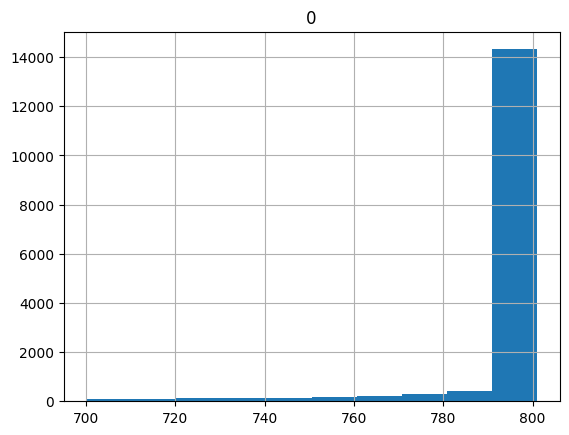

In [11]:
import pandas as pd


sizes = []
for column in X.columns:
    sizes.append(len(set(X[column])))

pd.DataFrame(sizes).hist()

In [12]:
from sklearn.cluster import KMeans, Birch
X = X.drop(columns=['Unnamed: 0'])

kmeans = KMeans(n_clusters=len(set(y['Class'])))
kmeans_labels = kmeans.fit_predict(X, y['Class'])

In [13]:
birch = Birch(n_clusters=len(set(y['Class'])))
birch_labels = birch.fit_predict(X, y['Class'])

In [14]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, kmeans_labels)
print(f'Silhouette score for KMeans: {sil_score}')
sil_score = silhouette_score(X, birch_labels)
print(f'Silhouette score for Birch: {sil_score}')

Silhouette score for KMeans: 0.13292137817259625
Silhouette score for Birch: 0.14465494226621955


In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=500)
pca_components = pca.fit_transform(X)

In [16]:
kmeans_lodim = KMeans(n_clusters=len(set(y['Class'])))
kmeans_lodim_labels = kmeans_lodim.fit_predict(pca_components, y['Class'])
birch_lodim = Birch(n_clusters=len(set(y['Class'])))
birch_lodim_labels = birch_lodim.fit_predict(pca_components, y['Class'])

In [17]:
sil_score_lodim = silhouette_score(X, kmeans_lodim_labels)
print(f'Silhouette score for KMeans low-dimensional data: {sil_score_lodim}')
sil_score_lodim = silhouette_score(X, birch_lodim_labels)
print(f'Silhouette score for Birch low-dimensional data: {sil_score_lodim}')

Silhouette score for KMeans low-dimensional data: 0.12799241579355958
Silhouette score for Birch low-dimensional data: 0.1450217832125887


In [30]:
pca_2d = PCA(n_components=2)
pca_2d_components = pca_2d.fit_transform(X)
pca_2d_components

array([[-69.22720757,  87.92433754],
       [-18.01369651,  -6.36972938],
       [-66.10387072, -34.77024607],
       ...,
       [ -3.60129088,   7.49094427],
       [-33.41686587,  27.11652405],
       [-19.31143507,   1.55884961]], shape=(801, 2))

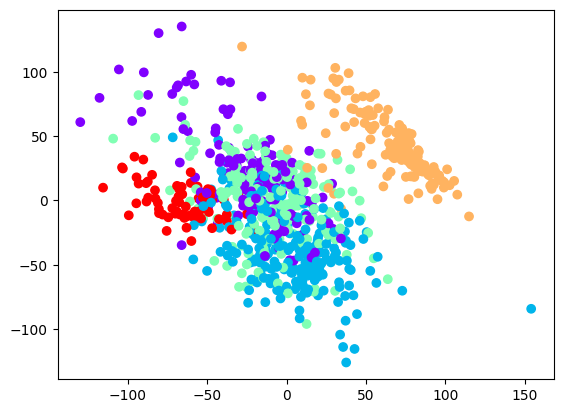

In [41]:
plt.scatter(pca_2d_components[:,0], pca_2d_components[:,1], c=birch_lodim_labels, cmap='rainbow')
